# Unsupervised Learning

In the case of unsupervised learning, we simply have a set of variables $X_1, X_2, \dots, X_n$ and **no response variable** $y$ to explain or predict.

We use unsupervised techniques in order to:


* **Find relationships between variables and/or observations**, e.g. showing joint data interaction between variables


* **Reducing data dimensions**


* **Grouping data** (cluster analysis)


* **Detecting anomalous data**

# Principal Component Analysis (PCA)

PCA is a methodology for performing a **dimensionality reduction** of a dataset by synthetizing relationships between variables and minimizing the resulting loss of informations

Variables are not orthogonal, since they are highly correlated. If we **rotate the coordinate axis** in the direction of greater variability, making those variables **orthogonal** in the new system.

Concretely, we subtract the **mean profile** (the vector of p values for an  hypothetical mean observation in the dataset) from the original dataset.

We are looking for a rotation matrix V which product with the original dataset $X$ will generate a new matrix (dataset) $Z$ as output which satisfies the following conditions:


* The new variables contained in $Z$ will be **orthogonal** with respect to each other. This translates algebrically in $Z^TZ = \Lambda = diag(\lambda_1, \lambda_2, \dots, \lambda_p)$. This represents a dataset in which all variables are independent.


* The variance of variable $n$ in $Z$ should be higher than the one of variable $n - 1$. **This condition makes the first PCs more important than the following ones**.


* The vector of coefficients V should be orthonormal in order to generate a unique solution.


PCA is, in algebric terms, a **spectral decomposition** (diagonalization into eigenvalues) **of the core of sample variance** (matrix of the covariances of our original set of values) ($\tilde{X}^T\tilde{X}$)

The j-th PC is the rotation of the original dataset with respect to the axis $v_j$ (geometrically), the linear combination between centered data matrix $\tilde{X}$ and $v_j$

After performing spectral decomposition, we obtain a diagonal matrix $S = V\Lambda V^T$, having the variances for each PC on the diagonal. The **total variance** is defined as the **trace of this matrix,** $\Sigma_{j =1}^p\lambda_j$

The proportion between each value and the total variance represent **the rate of total variance explained by that PC**. We can sum those rates in order to choose how many PCs to use.

Often we use standardized values of original dataset X in order to simplify the correlation relation between $x_r$ and $z_s$ to $cor(x_r, z_s) = \sqrt{\lambda_s}v_{rs}$

Practically, in order to choose the appropriate number of PC to consider, we can set some guidelines:

* Set a value representing the portion of total variance which should be represented by PCs, or the number of new variables we want for the new dataset.

* Using the **screeplot** of PCs with respect to their variance, stop at the **elbow point** of the variances curve or at the intersection between this curve and the mean variance of PCs.

PCA is a technique for **linear** dimensionality reduction. Components extract the maximum variance from the original variables and are orthogonal with respect to each other.

Critical points of PCA:

* **Difficult to interpret**, PC don't represent concrete variables. A solution could be using sub-optimal, more interpretable components (sca package)

* **Sensible to outliers** because it relies on the variance. pcaMethods package fix this and also allows to perform PCA with missing values.

PCA is not adequate:

* To adress **nonlinear relations between original variables**. There are some nonlinear PCA techniques where variables are transformed beforehand in order to maximize the variance explained by PCs (**optimal scaling**)

* To deal with **non-numerical variables**. In this case, we should use **Multiple correspondence analysis**, which uses the same logic of PCA in order to address categorical values.

# Biplot

It is a **multivariate generalization of a common scatterplot**. If you have more than two variables, biplot provides a joint representation in order to discover relations between variables, between observation and also  between variables and observations. It is a superposition of a graph of points and a graph of axis.


It uses singular value decomposition since it focuses on finding relations between variables and observation (PCA was looking between relations on variables only using $X^TX = V \Lambda V^T$, MDS looks for relations between observations only using $XX^T = U\Lambda U^T$).

## Singular Value Decomposition

It is a more general case of spectral decomposition that can be applied to rectangular matrix. It decomposes the matrix in three components $X = U\Gamma V^T$:

* $V$ is the matrix of orthonormal eigenvectors of $X^TX$. Represents **variables** in the dataset.


* $U$ is the matrix of orthonormal eigenvectors of $XX^T$. Represents **observations** in the dataset.


* $\Gamma$ is the matrix of roots of eigenvalues of X. It represent the relation between $U$ and $V$.

## Infinite Biplots

Using an approximation based on a limited number $k$ of PCs generated from SVD $Y = U_k \Gamma_k V_k^T$, we can decompose $\Gamma$ in $\Gamma = \Gamma_k^\alpha \Gamma_k^{1 - \alpha}$.

By changing the value of $\alpha$ between 0 and 1, we can obtain an infinite number of biplots. If we set $\alpha = 1$ we have normal PCA since 


# Laboratory: PCA on EU data

In [1]:
library(dplyr)  # optional
library(MASS)
library(PerformanceAnalytics)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last


Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend



In [2]:
 eu <- read.table("EUdemo.txt", header=TRUE, row.names=1)

In [3]:
eu %>% str
eu %>% head

'data.frame':	41 obs. of  13 variables:
 $ NAT : num  9.65 11.17 12.44 11.15 12.59 ...
 $ MOR : num  9.66 10.27 11.12 9.54 9.16 ...
 $ CR.N: num  -0.0124 0.8996 1.3152 1.6068 3.4264 ...
 $ MIG : num  2.447 1.574 1.766 0.658 0.846 ...
 $ CR.T: num  2.43 2.47 3.08 2.27 4.27 ...
 $ M.IN: num  4.3 5.3 4.2 3.6 4.8 4.7 5.9 5.5 5.2 2.9 ...
 $ VEC : num  92 95 80.6 81.4 84.3 ...
 $ N.FI: num  1.32 1.61 1.73 1.74 1.77 1.36 1.3 1.88 1.22 1.73 ...
 $ E.P : num  28.1 28.5 29.6 29.6 29.3 28.6 28.7 30.5 30 29.4 ...
 $ NU  : num  4.9 4.3 6.7 4.7 4.8 5.2 5.9 4.9 4.8 4.8 ...
 $ E.M : num  27 26.1 29.7 27.7 27.6 26.9 26.5 28.2 27.6 27.4 ...
 $ V.M : num  75.1 74.8 74.2 73.8 74.9 74.5 75.4 73.9 76 74.7 ...
 $ V.F : num  81 81.1 79 81 82.4 80.5 80.4 79 82.1 81.2 ...


,NAT,MOR,CR.N,MIG,CR.T,M.IN,VEC,N.FI,E.P,NU,E.M,V.M,V.F
Austria,9.650613,9.662970,-0.01235674,2.4466343,2.434278,4.3,92.0,1.32,28.1,4.9,27.0,75.1,81.0
Belgio,11.167121,10.267493,0.89962793,1.5743489,2.473977,5.3,95.0,1.61,28.5,4.3,26.1,74.8,81.1
Danimarca,12.437998,11.122802,1.31519615,1.7661205,3.081317,4.2,80.6,1.73,29.6,6.7,29.7,74.2,79.0
Finlandia,11.151013,9.544183,1.60683000,0.6582195,2.265049,3.6,81.4,1.74,29.6,4.7,27.7,73.8,81.0
Francia,12.590642,9.164214,3.42642783,0.8460316,4.272459,4.8,84.3,1.77,29.3,4.8,27.6,74.9,82.4
Germania,9.387304,10.308129,-0.92082545,2.4616247,1.540799,4.7,100.7,1.36,28.6,5.2,26.9,74.5,80.5


In [4]:
rownames(eu)
ind_EU <- which(rownames(eu) == "UE")
ind_EU

[1] "Austria"           "Belgio"            "Danimarca"        
 [4] "Finlandia"         "Francia"           "Germania"         
 [7] "Grecia"            "Irlanda"           "Italia"           
[10] "Lussemburgo"       "Paesi Bassi"       "Portogallo"       
[13] "Regno Unito"       "Spagna"            "Svezia"           
[16] "UE"                "Albania"           "Bielorussia"      
[19] "Bosnia-Erzegovina" "Bulgaria"          "Cipro"            
[22] "Croazia"           "Estonia"           "Islanda"          
[25] "Iugoslavia "       "Lettonia"          "Lituania"         
[28] "Macedonia"         "Malta"             "Moldova"          
[31] "Norvegia"          "Polonia"           "Repubblica ceca"  
[34] "Romania"           "Russia"            "San Marino"       
[37] "Slovacchia"        "Slovenia"          "Svizzera"         
[40] "Turchia"           "Ungheria"

[1] 16

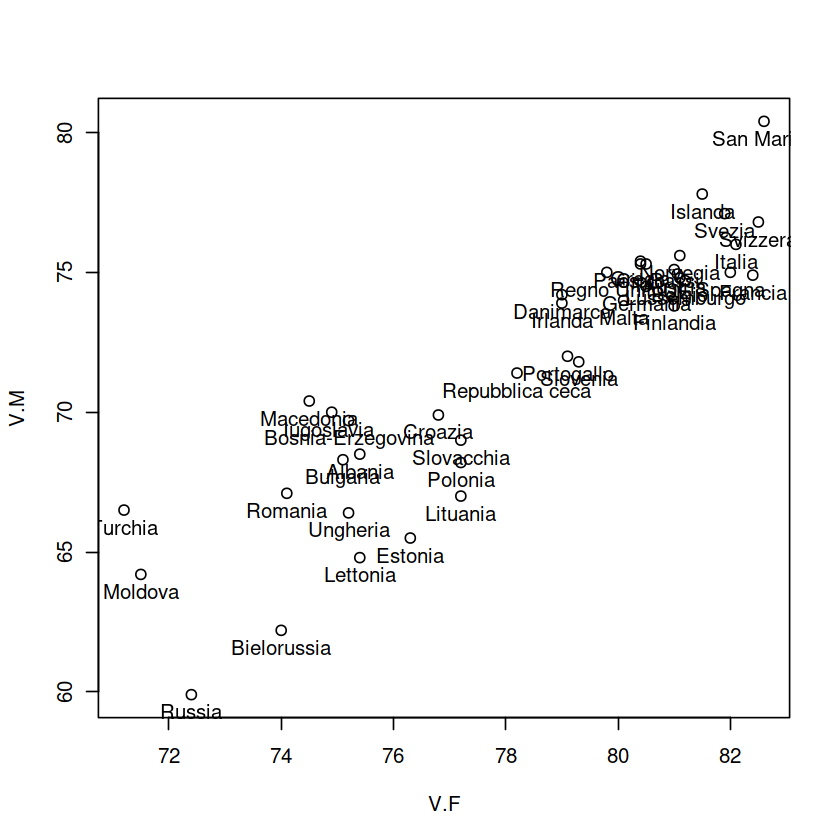

In [5]:
attach(eu)
plot(V.M ~ V.F)
text(V.M ~ V.F, labels=rownames(eu), pos=1)

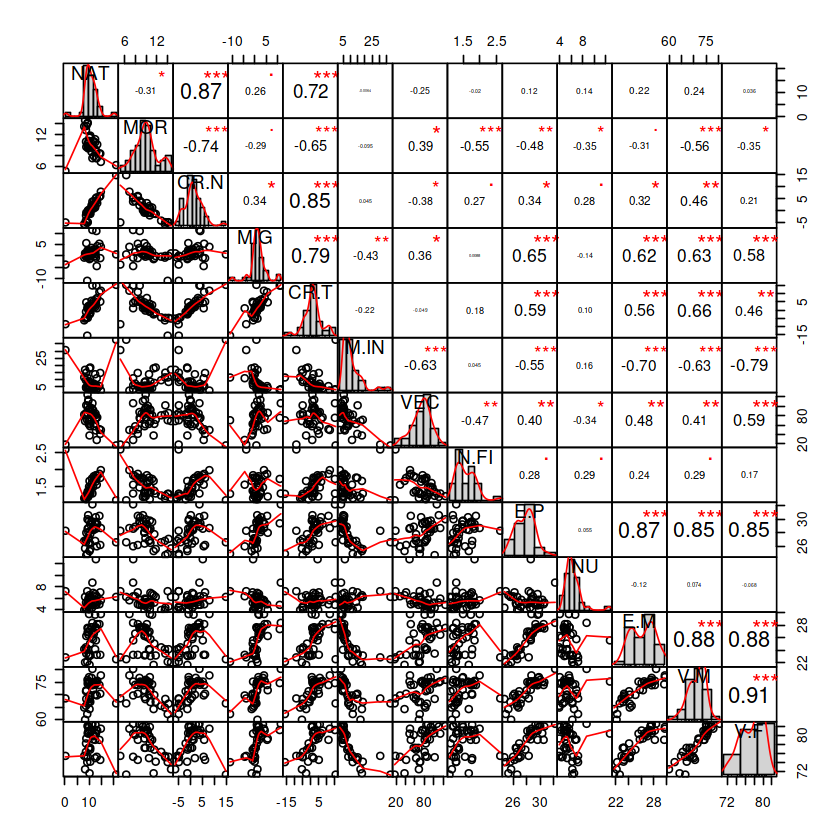

In [6]:
chart.Correlation(eu)

In [7]:
m <- colMeans(eu)

In [8]:
# By column = 2, by row = 1
apply(eu, 2, mean)

NAT        MOR       CR.N        MIG       CR.T       M.IN        VEC 
10.8785456 10.0597582  0.8187874  1.2081583  2.0269457  8.8585366 74.5634146 
      N.FI        E.P         NU        E.M        V.M        V.F 
 1.5079505 28.0496634  5.6584602 25.6877812 71.6424422 78.3257844

In [9]:
# Covariance matrix
S <- cov(eu)
# Correlation matrix
R <- cor(eu)
# Centered matrix (tilde X)
eu.cen <- scale(eu, scale=F)

In [10]:
eu.cen
# Means of columns are now ~= 0
colMeans(eu.cen)

,NAT,MOR,CR.N,MIG,CR.T,M.IN,VEC,N.FI,E.P,NU,E.M,V.M,V.F
Austria,-1.22793261,-0.39678817,-0.831144172,1.2384761,0.4073319,-4.55853659,17.4365854,-0.187950537,0.05033659,-0.75846017,1.31221878,3.4575578,2.6742156
Belgio,0.28857539,0.20773483,0.080840498,0.3661906,0.4470311,-3.55853659,20.4365854,0.102049463,0.45033659,-1.35846017,0.41221878,3.1575578,2.7742156
Danimarca,1.55945239,1.06304383,0.496408718,0.5579623,1.0543710,-4.65853659,6.0365854,0.222049463,1.55033659,1.04153983,4.01221878,2.5575578,0.6742156
Finlandia,0.27246739,-0.51557517,0.788042568,-0.5499387,0.2381038,-5.25853659,6.8365854,0.232049463,1.55033659,-0.95846017,2.01221878,2.1575578,2.6742156
Francia,1.71209639,-0.89554417,2.607640398,-0.3621267,2.2455137,-4.05853659,9.7365854,0.262049463,1.25033659,-0.85846017,1.91221878,3.2575578,4.0742156
Germania,-1.49124161,0.24837083,-1.739612882,1.2534664,-0.4861465,-4.15853659,26.1365854,-0.147950537,0.55033659,-0.45846017,1.21221878,2.8575578,2.1742156
Grecia,-1.19533861,-0.28161717,-0.913720832,1.1651768,0.2514560,-2.95853659,39.0365854,-0.207950537,0.65033659,0.24153983,0.81221878,3.7575578,2.0742156
Irlanda,3.31283839,-1.61947917,4.932317528,4.1169389,9.0492564,-3.35853659,-23.2634146,0.372049463,2.45033659,-0.75846017,2.51221878,2.2575578,0.6742156
Italia,-1.55966361,-0.14760417,-1.412059522,0.5508414,-0.8612181,-3.65853659,49.9365854,-0.287950537,1.95033659,-0.85846017,1.91221878,4.3575578,3.7742156
Lussemburgo,2.07092839,-1.27261517,3.343543478,9.6601502,13.0036937,-5.95853659,0.8365854,0.222049463,1.35033659,-0.85846017,1.71221878,3.0575578,2.8742156


NAT           MOR          CR.N           MIG          CR.T 
 4.982464e-16  8.231898e-16  5.144936e-17  4.061792e-17 -2.166289e-16 
         M.IN           VEC          N.FI           E.P            NU 
 9.098413e-16  3.466062e-16  4.332578e-17  2.599547e-16 -3.791005e-16 
          E.M           V.M           V.F 
-1.039819e-15 -7.105427e-15  6.238912e-15

In [11]:
# See the variances for our values
diag(S)

NAT          MOR         CR.N          MIG         CR.T         M.IN 
  8.53529848   4.55981406  16.96127401  12.67469577  39.47683209  53.04598780 
         VEC         N.FI          E.P           NU          E.M          V.M 
610.79187805   0.09134714   3.04317664   2.40057554   5.38651939  21.65206534 
         V.F 
 10.67211683

We can observe variances are very different for all variables. Knowing that PCA maximizes the variance, it will be highly influenced by the scale used in our variables (in this case, the VEC variable will lead the result).

For this reason we decide to perform PCA on the matrix R, which is basically a standardized version of S to avoid these problems.

# PCA

In [12]:
help(prcomp)

In [13]:
help(princomp)

In [14]:
help(svd)

In [15]:
# Scales the matrix to a standardized one with unitary variance
PCdemo <- prcomp(scale(eu))
PCdemo2 <- princomp(covmat = cor(eu))
summary(PCdemo)
summary(PCdemo2)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5    PC6    PC7
Standard deviation     2.4308 1.8014 1.2318 0.88721 0.77533 0.6440 0.5099
Proportion of Variance 0.4545 0.2496 0.1167 0.06055 0.04624 0.0319 0.0200
Cumulative Proportion  0.4545 0.7041 0.8209 0.88141 0.92765 0.9596 0.9796
                           PC8     PC9    PC10    PC11      PC12      PC13
Standard deviation     0.38230 0.26107 0.18410 0.13264 6.485e-08 3.162e-09
Proportion of Variance 0.01124 0.00524 0.00261 0.00135 0.000e+00 0.000e+00
Cumulative Proportion  0.99080 0.99604 0.99865 1.00000 1.000e+00 1.000e+00

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.4308139 1.8013700 1.2318199 0.88721081 0.77533376
Proportion of Variance 0.4545274 0.2496103 0.1167216 0.06054946 0.04624173
Cumulative Proportion  0.4545274 0.7041377 0.8208593 0.88140875 0.92765048
                           Comp.6     Comp.7     Comp.8      Comp.9     Comp.10
Standard deviation     0.64398056 0.50993482 0.38230364 0.261069355 0.184097680
Proportion of Variance 0.03190084 0.02000258 0.01124277 0.005242862 0.002607074
Cumulative Proportion  0.95955132 0.97955390 0.99079667 0.996039537 0.998646610
                          Comp.11      Comp.12 Comp.13
Standard deviation     0.13264263 6.381537e-08       0
Proportion of Variance 0.00135339 3.132617e-16       0
Cumulative Proportion  1.00000000 1.000000e+00       1

In [16]:
# sdev: standard deviation of PCs, roots of eigenvalues 
# center: returns the centroid, the means that were subtracted
# x : PC scores
# scale: specifies how each dimension was scaled to be standardized
names(PCdemo)
names(PCdemo2)

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] "sdev"     "loadings" "center"   "scale"    "n.obs"    "scores"   "call"

In [17]:
# The pxp V matrix containing the eigenvectors, the one used to rotate
# the axis for PCs.
PCdemo$rot
# Represents the same thing but interpreted in algebraic term, the weights
# of the linear combination corresponding to the new conformation.
PCdemo2$load

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
NAT,0.16399683,0.31588445,-0.49840174,0.179319989,-0.40149401,-0.07515790,-0.22034585,0.07320008,0.18001127,-0.0348591279,-0.09359318,-5.741300e-01,-1.140755e-03
MOR,-0.23628363,-0.35762844,-0.23452208,0.135411199,-0.21602977,-0.47064520,-0.36110383,0.04859840,0.03840472,-0.0469155466,-0.40277681,4.196377e-01,8.337912e-04
CR.N,0.23884821,0.40951120,-0.23195872,0.056996369,-0.17280230,0.19071140,0.03092106,0.02672882,0.10778401,-0.0004029583,0.14244436,6.097307e-01,4.966056e-01
MIG,0.31273438,-0.06027224,-0.22925138,-0.222864641,0.54683031,-0.50887734,0.11279764,0.06688805,-0.05412740,-0.0613113066,-0.04001970,-1.725506e-01,4.279003e-01
CR.T,0.33376363,0.23427365,-0.28194396,-0.088921364,0.19658097,-0.16333676,0.08418232,0.05542076,0.03997997,-0.0350047983,0.07069287,3.045221e-01,-7.551703e-01
M.IN,-0.25435056,0.32366129,-0.01737317,-0.219683021,0.40983335,0.31489146,-0.57004986,0.24796793,-0.08729464,-0.2638152788,-0.22628059,-8.613350e-09,-1.155571e-09
VEC,0.13643722,-0.47822489,-0.12898179,0.195280549,0.14627470,0.20564525,-0.22937419,0.50191064,0.34066225,0.0621293539,0.45802964,1.660215e-08,8.585567e-10
N.FI,0.11232422,0.24719017,0.57211724,-0.327522380,-0.27945007,-0.40559059,-0.16363391,0.34772037,0.29785894,-0.0029459193,0.11261013,1.182159e-08,1.150366e-09
E.P,0.36776488,-0.08219099,0.17078736,-0.009631376,0.16438181,0.10196078,-0.42868203,-0.59986995,0.40162585,0.2621062913,-0.13304098,3.327504e-08,-7.514371e-10
NU,0.01754236,0.27909851,0.30578069,0.825497927,0.26373308,-0.23575123,-0.07367063,0.03005835,-0.08516338,-0.0775576571,0.04598901,-1.129117e-08,1.720805e-10



Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
NAT   0.164  0.316  0.498  0.179  0.401         0.220         0.180        
MOR  -0.236 -0.358  0.235  0.135  0.216  0.471  0.361                      
CR.N  0.239  0.410  0.232         0.173 -0.191                0.108        
MIG   0.313         0.229 -0.223 -0.547  0.509 -0.113                      
CR.T  0.334  0.234  0.282        -0.197  0.163                             
M.IN -0.254  0.324        -0.220 -0.410 -0.315  0.570  0.248         0.264 
VEC   0.136 -0.478  0.129  0.195 -0.146 -0.206  0.229  0.502  0.341        
N.FI  0.112  0.247 -0.572 -0.328  0.279  0.406  0.164  0.348  0.298        
E.P   0.368        -0.171        -0.164 -0.102  0.429 -0.600  0.402 -0.262 
NU           0.279 -0.306  0.825 -0.264  0.236                             
E.M   0.371 -0.146                0.226         0.406 -0.119 -0.680  0.180 
V.M   0.391        -0.124               -0.202         0.417 -0.269 -0.494 
V

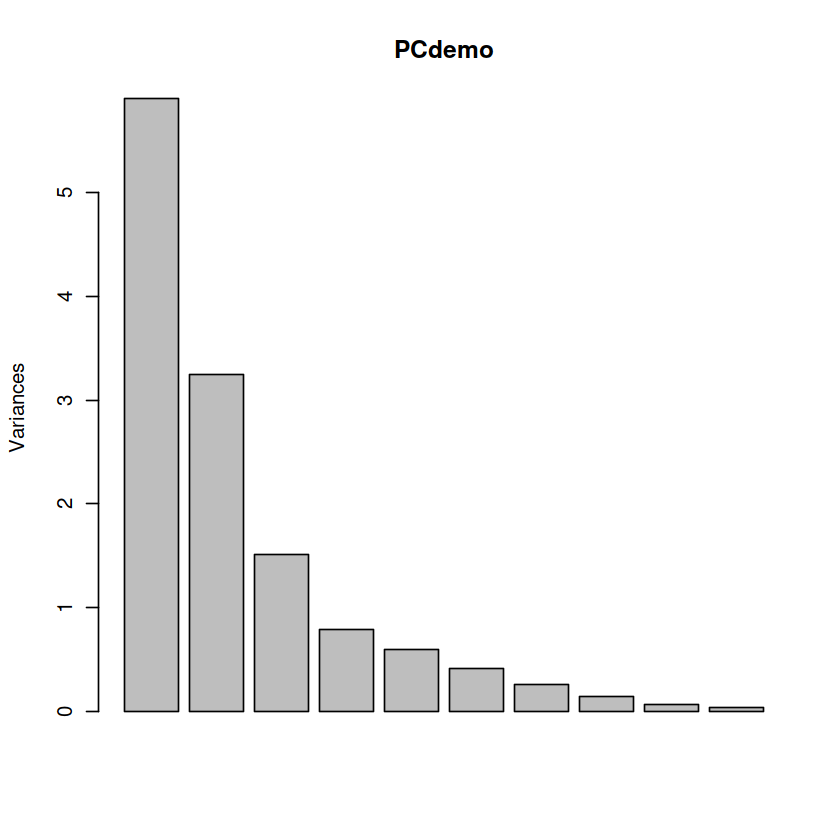

Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“graphical parameter "type" is obsolete”

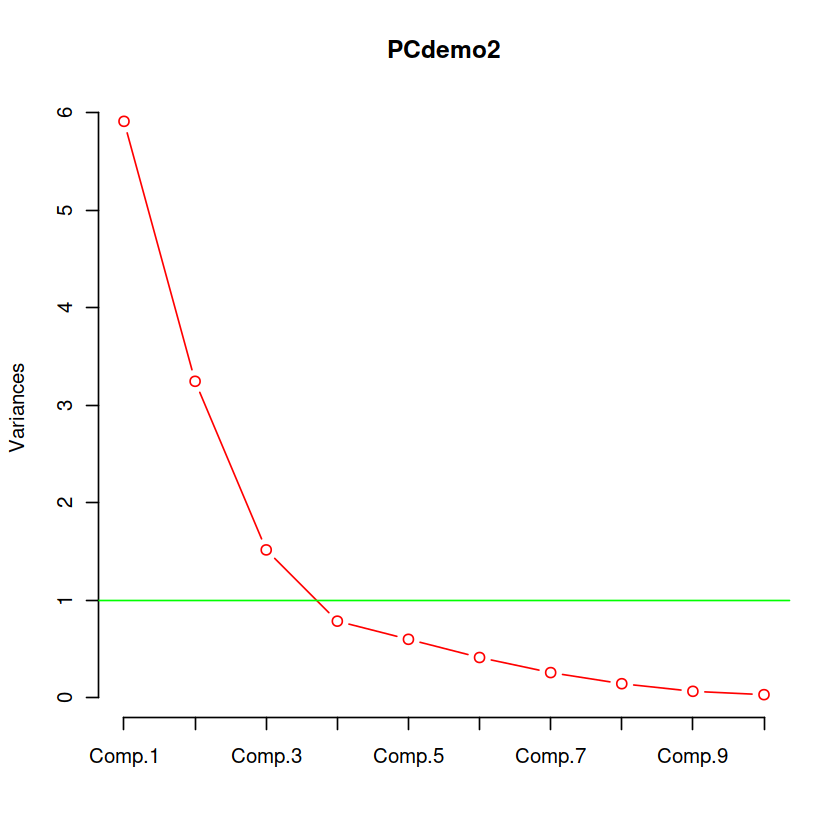

In [18]:
screeplot(PCdemo)
plot(PCdemo2, type="l", col="red")
abline(h = 1, type="-", col="green")

In [19]:
# The green line represents the variance of the original standardized
# matrix. Given this, we choose to take only the first 3 PCs.

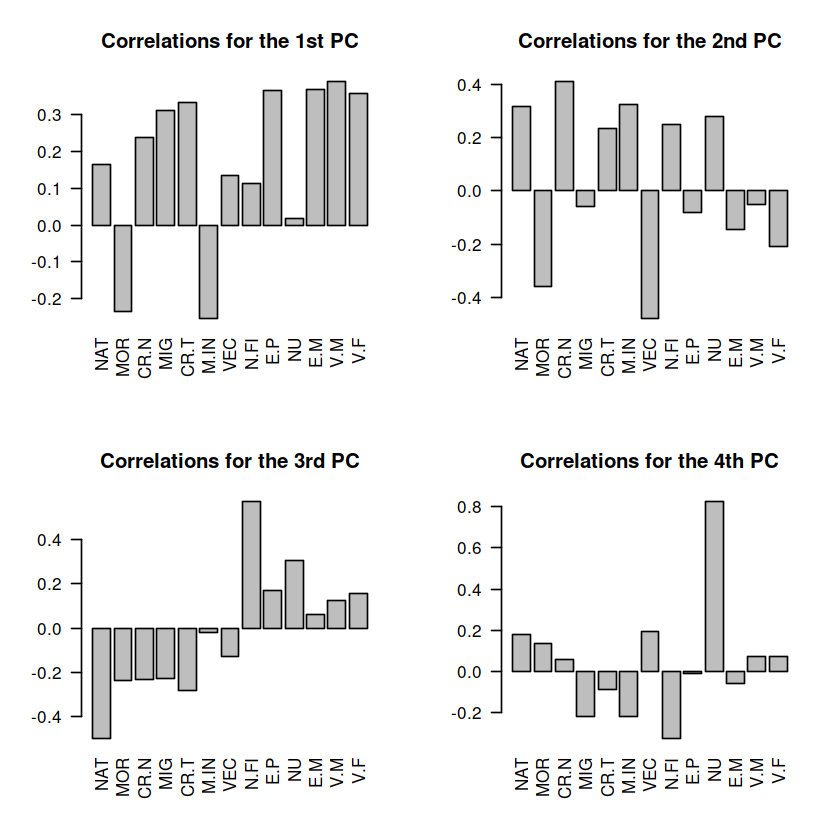

In [20]:
par(mfrow=c(2,2))
barplot(PCdemo$rot[,1], main="Correlations for the 1st PC", las=2)
barplot(PCdemo$rot[,2], main="Correlations for the 2nd PC", las=2)
barplot(PCdemo$rot[,3], main="Correlations for the 3rd PC", las=2)
barplot(PCdemo$rot[,4], main="Correlations for the 4th PC", las=2)

We see that the 1st PC represents developed countryes, with low mortality, high migration and high life expectancy.

The second component could represent european countries, with low natality.

In [21]:
# %*% is a matrix product
# corr = V * sqrt(lambda)
corr <- PCdemo$rot[,1:4] %*% diag(PCdemo$sdev[1:4])

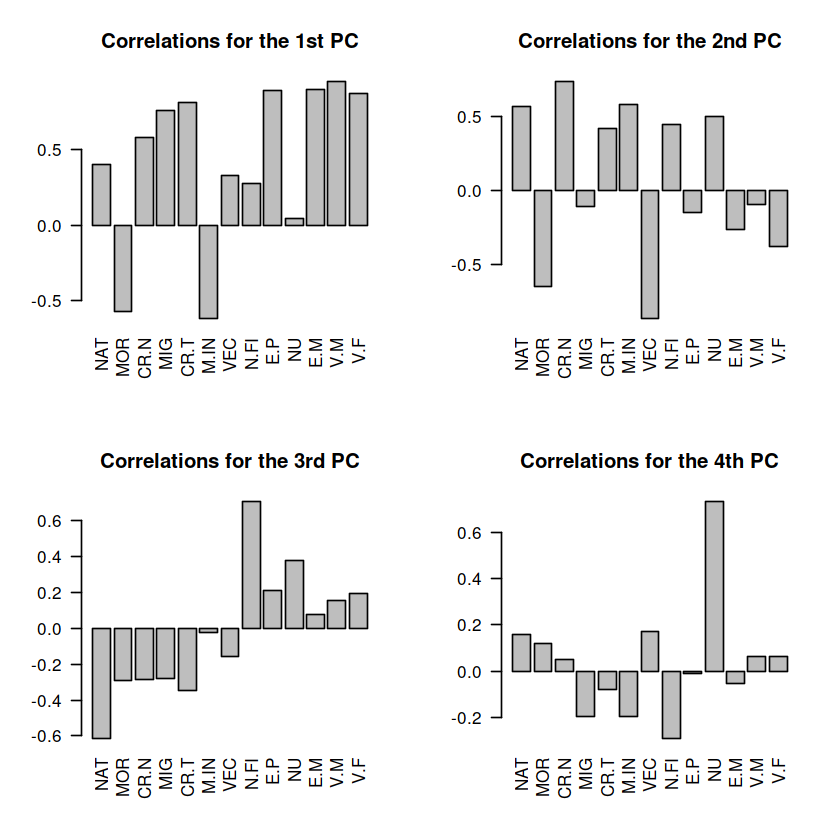

In [22]:
par(mfrow=c(2,2))
barplot(corr[,1], main="Correlations for the 1st PC", las=2)
barplot(corr[,2], main="Correlations for the 2nd PC", las=2)
barplot(corr[,3], main="Correlations for the 3rd PC", las=2)
barplot(corr[,4], main="Correlations for the 4th PC", las=2)

Those new plots are scaled with respect to the variance of the PC, in a way that height of the bars represents their true importance.

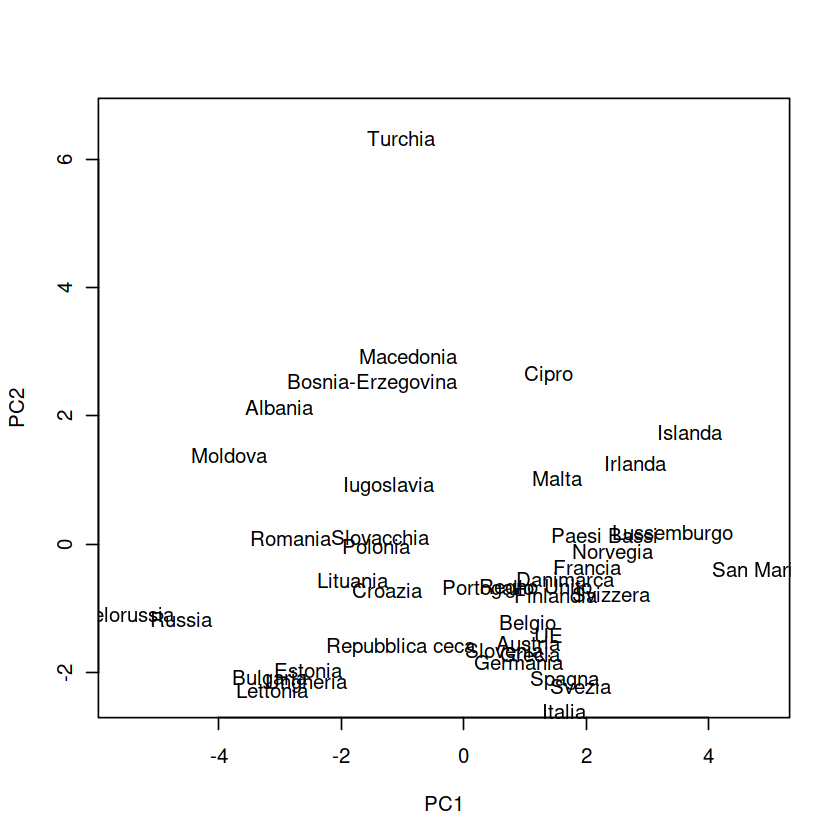

In [23]:
plot(PCdemo$x[,1:2], pch="")
text(PCdemo$x[,1:2],labels=rownames(eu), pos=1)

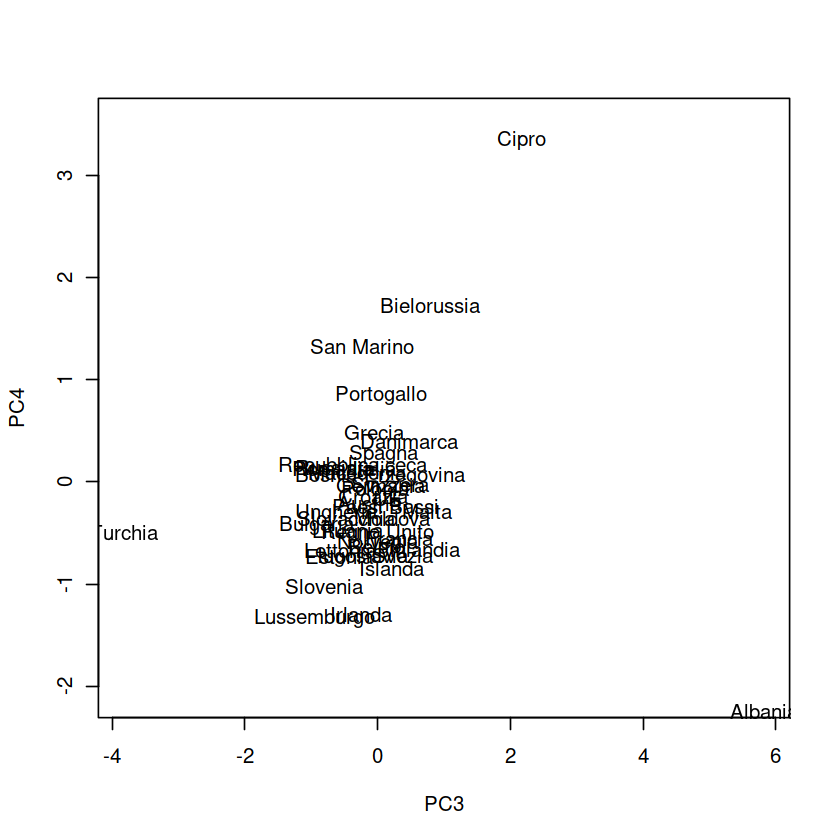

In [24]:
plot(PCdemo$x[,3:4], pch="")
text(PCdemo$x[,3:4],labels=rownames(eu), pos=1)

In [25]:
z <- scale(eu) %*% PCdemo$rot[,1:4]

In [26]:
z

,PC1,PC2,PC3,PC4
Austria,1.0393133,-1.27708004,-0.1228293190,-0.042798516
Belgio,1.0449962,-0.95739452,-0.0212360018,-0.467072425
Danimarca,1.6505640,-0.28019016,0.4740481653,0.566830092
Finlandia,1.5030541,-0.52914266,0.6100033080,-0.491360929
Francia,2.0083461,-0.09792739,0.3241107079,-0.383107783
Germania,0.8906073,-1.58034641,0.0364231825,0.133972081
Grecia,1.0819137,-1.45066130,-0.0575222062,0.649681600
Irlanda,2.7936650,1.51577394,-0.2509203419,-1.134351056
Italia,1.6344388,-2.34361223,-0.0613644592,0.302500561
Lussemburgo,3.4072881,0.45002391,-0.9484913007,-1.148963503


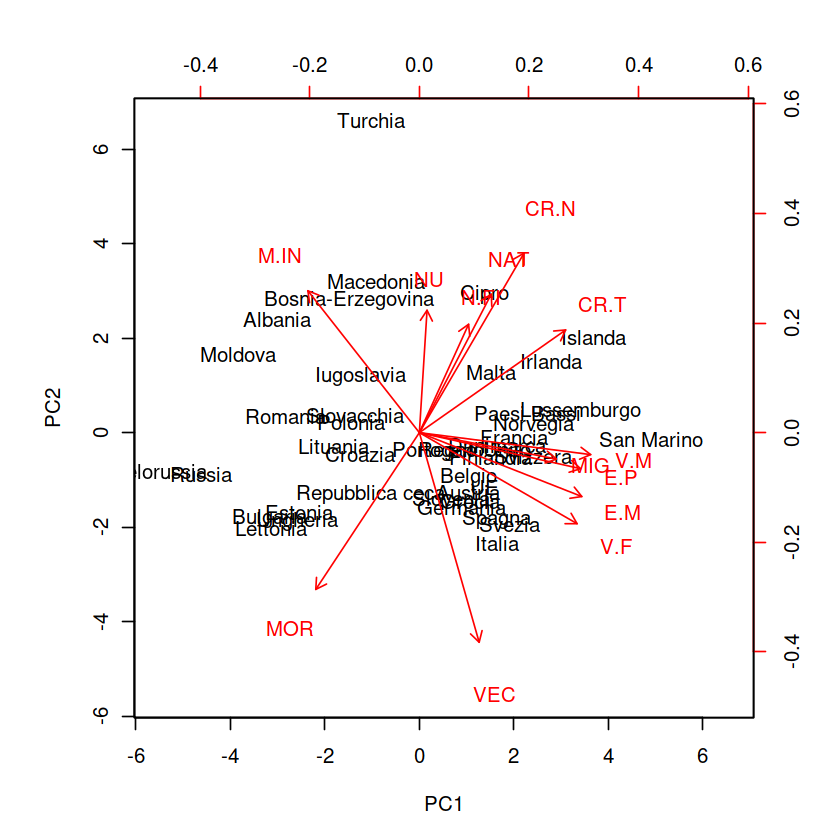

In [27]:
# In this case alpha = 1, so the biplot is another representation of PCA
# G = z = U * Gamma
# H = V^T
biplot(z[,1:2], loadings(PCdemo2)[,1:2])

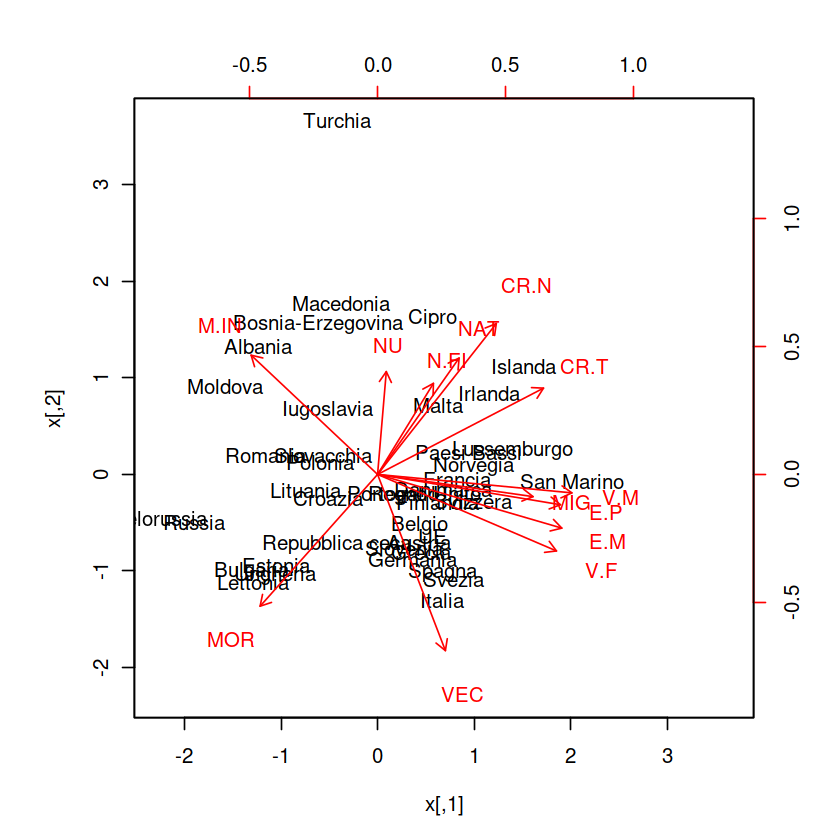

In [28]:
# In this case alpha = 0, so the biplot is another representation of PCA
# G = U = Standardized principal components
# H = Gamma * V^T = Correlation of PC
z.n  <- z[,1:4] %*% diag(1/PCdemo2$sdev[1:4])
biplot(z.n[,1:2], corr[,1:2])
# The coordinates of vectors are correlations between each one of the
# variables and the two PCs. Basically, the barplots represented in 2D
# for the first two PCs.

In order to detect relations between different variables:

* If the angle between two vectors is 90 degrees, there is no correlation between the variables.

* If the angle is acute, there is positive correlation.

* If the angle is obtuse, there is negative correlation.

The length of each vector represent how much the variable has been important in constructing the first two PCs, how much of its information is encoded inside the PCs.

$$\|x\| = \sqrt{cor(x, PC1)^2 + cor(x, PC2)^2}$$

We can compute the $R^2$ statistics to compute the rate of the variance explained by the first two PCs. Since the two components are orthogonal, the $R^2$ is equal to the sum of individual correlation coefficients for the two values:

$$R^2 = r_1^2 + r_2^2$$

In [29]:
# Values for standardized Italy variables
scale(eu)["Italia", ]

NAT        MOR       CR.N        MIG       CR.T       M.IN        VEC 
-0.5338529 -0.0691234 -0.3428655  0.1547240 -0.1370699 -0.5023208  2.0205622 
      N.FI        E.P         NU        E.M        V.M        V.F 
-0.9527312  1.1180108 -0.5540672  0.8239170  0.9364692  1.1553177

In [30]:
# We see the VEC variable which better explains Italy is explained better
# by PCs 1 and 2.
corr["VEC",]

[1]  0.3316535 -0.8614600 -0.1588823  0.1732550

# Laboratory 2: PCA on Face Data

In [31]:
library(dplyr)
library(R.matlab)
library(imager)

R.matlab v3.6.2 (2018-09-26) successfully loaded. See ?R.matlab for help.

Attaching package: ‘R.matlab’

The following objects are masked from ‘package:base’:

    getOption, isOpen

Loading required package: magrittr

Attaching package: ‘imager’

The following object is masked from ‘package:magrittr’:

    add

The following objects are masked from ‘package:stats’:

    convolve, spectrum

The following object is masked from ‘package:graphics’:

    frame

The following object is masked from ‘package:base’:

    save.image



In [32]:
x <- readMat("ex7faces.mat")
x %>% str()

List of 1
 $ X: num [1:5000, 1:1024] -37.87 8.13 -32.87 -84.87 2.13 ...
 - attr(*, "header")=List of 3
  ..$ description: chr "MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 23:46:35 2011                                                "
  ..$ version    : chr "5"
  ..$ endian     : chr "little"


In [33]:
x <- data.frame(x)
x %>% dim

[1] 5000 1024

In [34]:
x[1:6,1:6]

X.1,X.2,X.3,X.4,X.5,X.6
-37.866314,-45.8663139,-53.866314,-51.866314,-40.866314,-33.86631
8.133686,-0.8663139,-8.866314,-15.866314,-17.866314,-16.86631
-32.866314,-34.8663139,-36.866314,-18.866314,6.133686,15.13369
-84.866314,-64.8663139,-47.866314,-42.866314,-38.866314,-28.86631
2.133686,6.1336861,5.133686,9.133686,10.133686,11.13369
60.133686,58.1336861,60.133686,59.133686,56.133686,41.13369


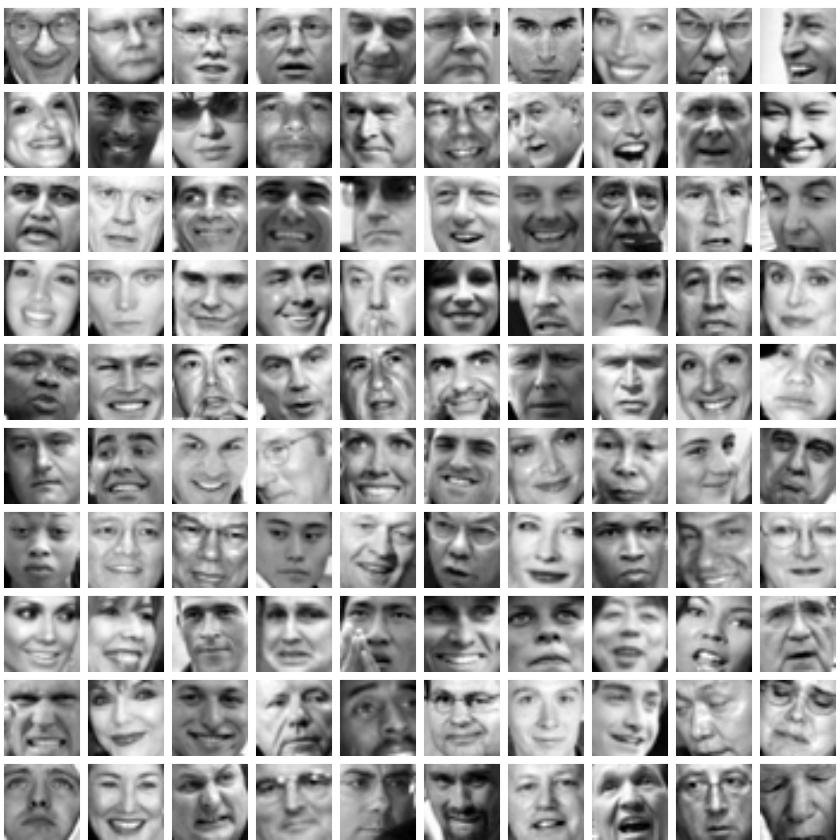

In [35]:
n <- nrow(x)
p <- ncol(x)
npix <- sqrt(p)

v <- 100

# Used for a 10x10 picture
ll <- vector("list", v)

for (i in 1:v) {
    # Fills the vector with all the pixels for each face
    ll[[i]] <- as.cimg(x[i, ] %>% as.numeric, x = npix, y = npix)
    # Transpose for vertically positioned faces
    ll[[i]][, , 1, 1] <- t(ll[[i]][, , 1, 1])
}

par(mfrow = c(sqrt(v), sqrt(v)), mar = c(0, 0, 0.5, 0), bg = "darkslategray")
for (i in 1:v) plot(ll[[i]], axes = F)

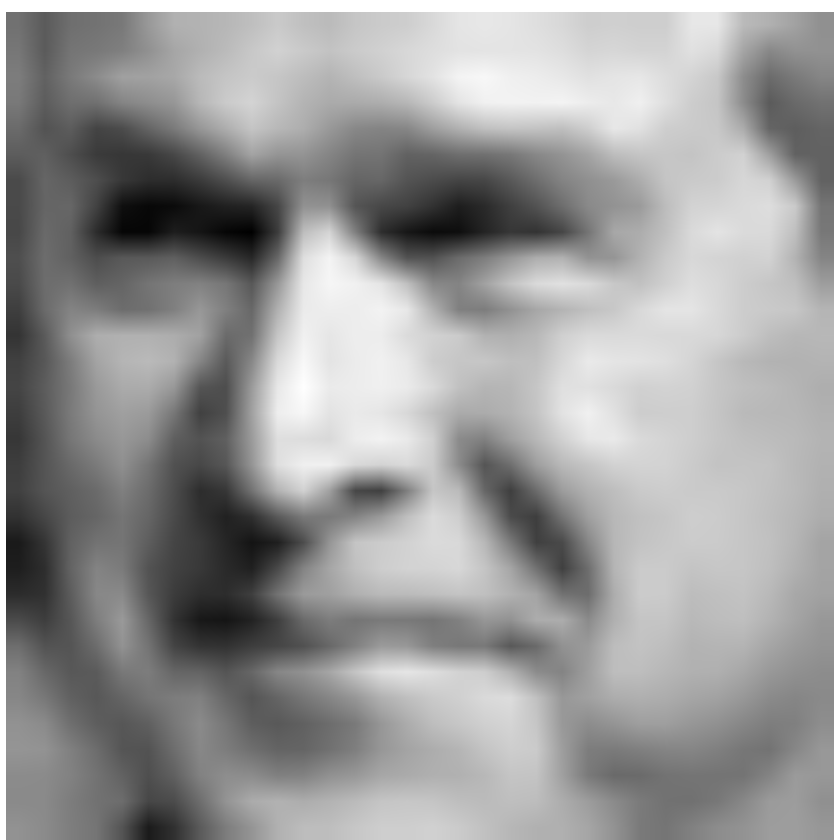

In [36]:
# Each image has 1024 features, which represent the greyness of each pixel
# in the image
par(mfrow = c(1,1), mar = c(0, 0, 0.5, 0), bg = "darkslategray")
plot(ll[[15]], axes = F)

In [37]:
x  %>% cor %>% as.vector %>% replace(.==1,NA) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-0.0846  0.1760  0.3141  0.3124  0.4334  0.9833    1024 

In [38]:
x %>% colMeans() %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -42.26  -11.92   -1.27    0.00   12.04   41.45 

In [39]:
x %>% var %>% diag %>% sqrt %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  31.70   37.13   39.78   40.35   42.61   59.38 

In [40]:
# We use the non-standardized version of the matrix
# since we assume all variables are on the same scale.
pca <- prcomp(x)

In [41]:
names(pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [49]:
pca$rot %>% dim

[1] 1024 1024

In [51]:
pca$rot[1:6,1:6]

,PC1,PC2,PC3,PC4,PC5,PC6
X.1,0.02044730,0.04609067,0.03992254,-0.06635754,0.001412162,-0.04155998
X.2,0.02082927,0.04794968,0.04100448,-0.06595553,0.001139532,-0.03930939
X.3,0.02088808,0.04946636,0.04327971,-0.06512997,-0.000742312,-0.03520225
X.4,0.02106704,0.05089811,0.04502754,-0.06260037,-0.003143808,-0.02982460
X.5,0.02110697,0.05243051,0.04657941,-0.05951520,-0.004861879,-0.02313344
X.6,0.02112712,0.05412442,0.04796894,-0.05535349,-0.007276665,-0.01300574


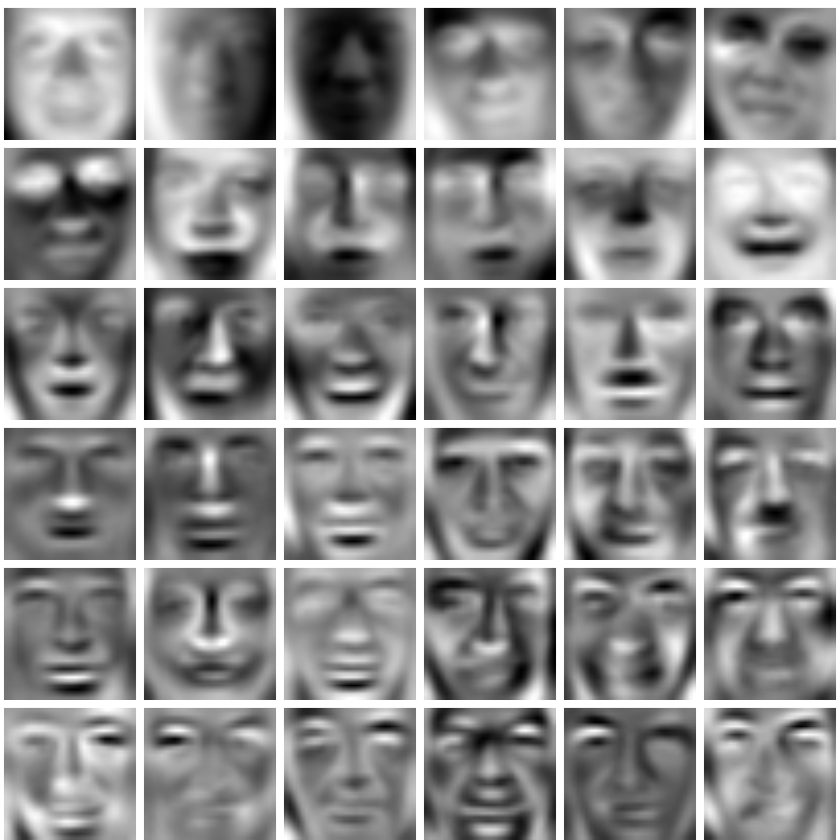

In [53]:
m <- 36

eigenfaces <- vector("list", m)

for (i in 1:m) {
    # Fills the vector with all the pixels for each face
    eigenfaces[[i]] <- as.cimg(pca$rot[, i] %>% as.numeric, x = npix, y = npix)
    # Transpose for vertically positioned faces
    eigenfaces[[i]][, , 1, 1] <- t(eigenfaces[[i]][, , 1, 1])
}

par(mfrow = c(sqrt(m), sqrt(m)), mar = c(0, 0, 0.5, 0), bg = "darkslategray")
for (i in 1:m) plot(eigenfaces[[i]], axes = F)

In [54]:
# We see that with an approximated x hat = 100
# (smaller that 10% of original dataset) the proportion of variance
# explained by PCs is 93%
summary(pca)

Importance of components:
                            PC1      PC2       PC3       PC4      PC5       PC6
Standard deviation     715.2372 481.2278 334.67523 263.47174 243.2002 192.48980
Proportion of Variance   0.3028   0.1371   0.06629   0.04108   0.0350   0.02193
Cumulative Proportion    0.3028   0.4398   0.50609   0.54717   0.5822   0.60410
                             PC7       PC8       PC9      PC10      PC11
Standard deviation     186.99218 175.50772 163.84188 161.90590 146.70477
Proportion of Variance   0.02069   0.01823   0.01589   0.01551   0.01274
Cumulative Proportion    0.62479   0.64302   0.65891   0.67442   0.68716
                            PC12      PC13      PC14     PC15      PC16
Standard deviation     146.00354 136.54083 122.95700 1.18e+02 113.76218
Proportion of Variance   0.01262   0.01103   0.00895 8.24e-03   0.00766
Cumulative Proportion    0.69977   0.71081   0.71975 7.28e-01   0.73565
                            PC17     PC18      PC19      PC20    PC21     

In [58]:
# We choose to use the first 100 PCs to rebuild faces starting from PCs
k <- 100
z <- pca$x[,1:k]

In [89]:
x_approx <- z %*% t(pca$rot[,1:k])

In [90]:
x_approx %>% dim

[1] 5000 1024

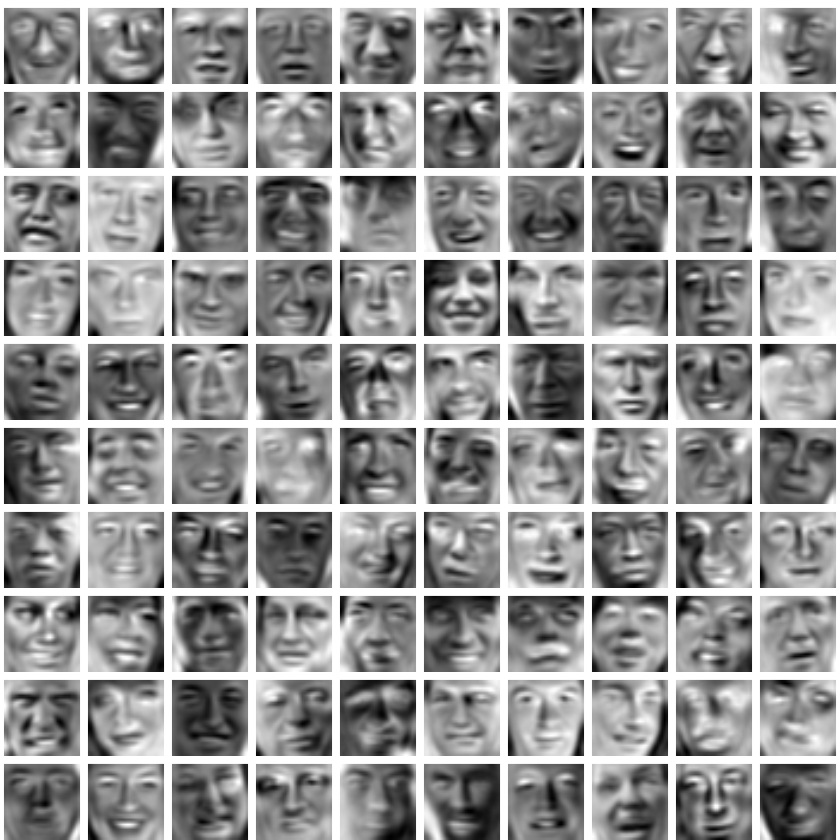

In [91]:
n <- nrow(x_approx)
p <- ncol(x_approx)
npix <- sqrt(p)

v <- 100

# Used for a 10x10 picture
ll <- vector("list", v)

for (i in 1:v) {
    # Fills the vector with all the pixels for each face
    ll[[i]] <- as.cimg(x_approx[i, ] %>% as.numeric, x = npix, y = npix)
    # Transpose for vertically positioned faces
    ll[[i]][, , 1, 1] <- t(ll[[i]][, , 1, 1])
}

par(mfrow = c(sqrt(v), sqrt(v)), mar = c(0, 0, 0.5, 0), bg = "darkslategray")
for (i in 1:v) plot(ll[[i]], axes = F)